# Import necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif

# Load and explore the data

In [2]:
# Load the Excel file
data = pd.read_excel('MOVIE RATING PREDICTION.xlsx')

In [3]:
print(data.head())  # View the first few rows of the dataset

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [4]:
print(data.info())# Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None


In [6]:
# Remove the hyphen from the 'Year' column
data['Year'] = data['Year'].astype(str).apply(lambda x: x[1:] if x.startswith('-') else x)

In [7]:
print(data.describe())  # Summary statistics

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [8]:
# Check for missing values in each column
print(data.isnull().sum())  

Name           0
Year           0
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [9]:
data.dropna(inplace=True)  # Drop rows with any missing value

In [10]:
# Replace missing values in a specific column with its mean
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

In [11]:
# Save the modified data back to Excel
data.to_excel('MOVIE RATING PREDICTION.xlsx', index=False)

#  Count the Frequency of Genres

In [12]:
# Splitting genres and creating a list of all genres
all_genres = [genre.strip() for sublist in data['Genre'].str.split('|') for genre in sublist]

# Counting the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()
print(genre_counts)

Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Length: 376, dtype: int64


# Visualize the Genre Distribution 

Drama                     844
Drama, Romance            332
Action, Crime, Drama      329
Action, Drama             206
Comedy, Drama             205
Comedy, Drama, Romance    188
Comedy                    187
Action                    170
Drama, Family             160
Romance                   126
dtype: int64


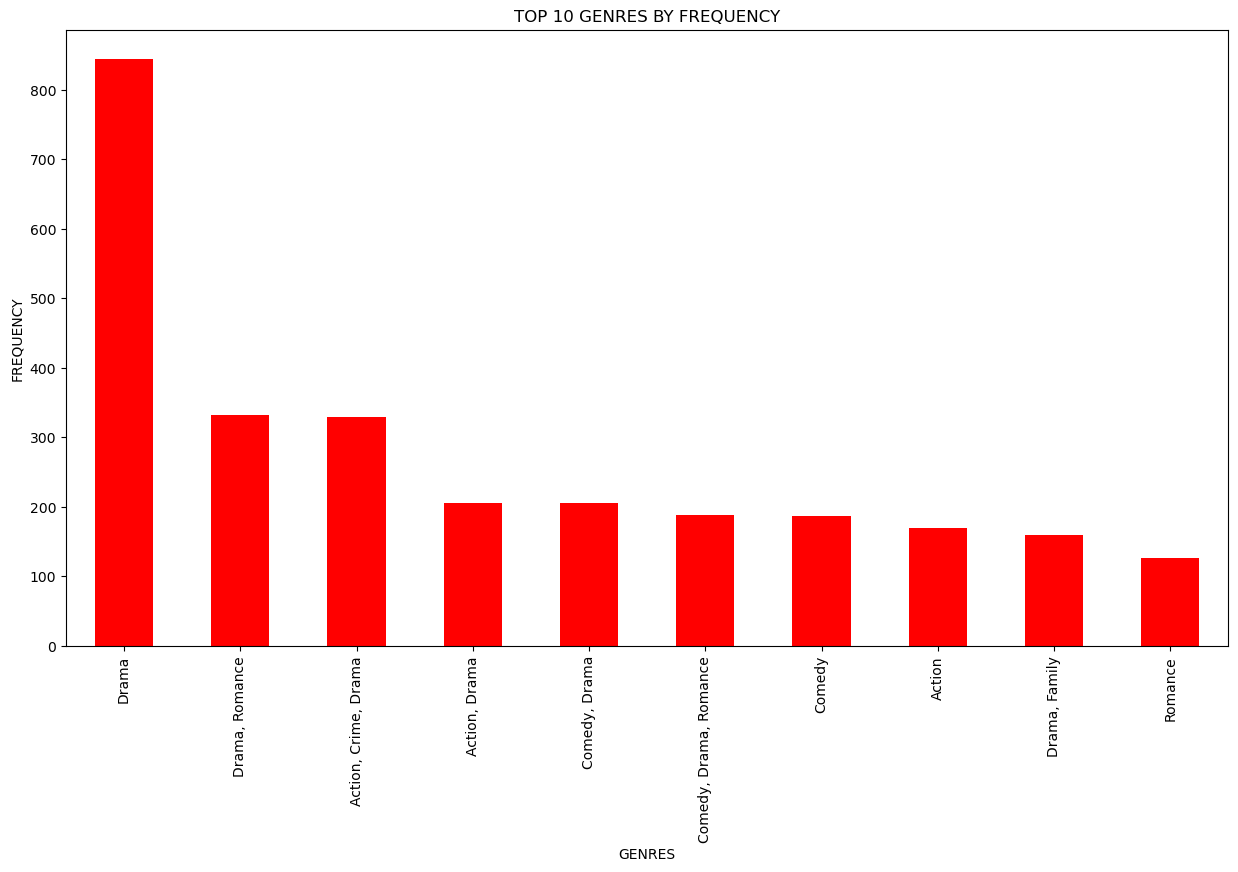

In [13]:
# Get the top 10 genres
top_10_genres = genre_counts.head(10)
print(top_10_genres)

# Plotting the bar graph for top 10 genres
plt.figure(figsize=(15,8))
top_10_genres.plot(kind='bar', color='red')
plt.title('TOP 10 GENRES BY FREQUENCY')
plt.xlabel('GENRES')
plt.ylabel('FREQUENCY')
plt.show()

# For Directors

In [14]:
director_movie_count = data['Director'].value_counts()
print(director_movie_count)

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
                        ..
Sriram Raja              1
Randeep Jha              1
Vicky Bhardwaj           1
Salar Shaikh             1
Mozez Singh              1
Name: Director, Length: 2431, dtype: int64


# Visualize the top 5 directors by movie counts

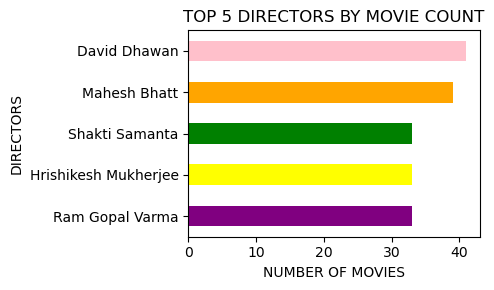

In [15]:
top_5_directors = director_movie_count.head(5)

# Plotting the horizontal bar graph for top 5 directors
plt.figure(figsize=(5, 3))
top_5_directors.sort_values().plot(kind='barh',color=('purple','yellow','green','orange','pink'))
plt.title('TOP 5 DIRECTORS BY MOVIE COUNT')
plt.xlabel('NUMBER OF MOVIES')
plt.ylabel('DIRECTORS')
plt.tight_layout()
plt.show()

# Visualize the Correlation heatmap between rating and votes

In [16]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

data.dropna(subset=['Rating', 'Votes'], inplace=True)

correlation_matrix = data[['Rating', 'Votes']].corr()


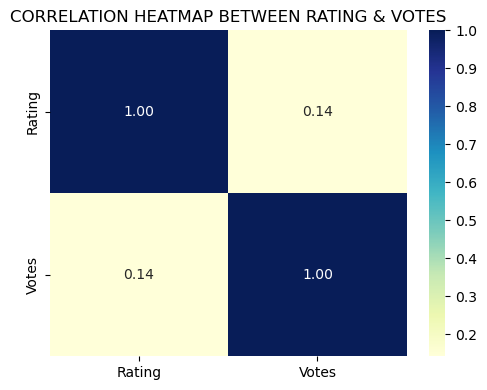

In [17]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('CORRELATION HEATMAP BETWEEN RATING & VOTES')
plt.tight_layout()
plt.show()

# Tabulate the top 10 highest rated movies

In [18]:
top_10_movies = data.nlargest(10, 'Rating')

# Extract titles and directors of the top 10 movies
top_10_titles = top_10_movies['Name']
top_10_directors = top_10_movies['Director']
top_10_ratings=top_10_movies['Rating']

In [19]:
movies_info = [[Name,Director,Rating] for Name,Director,Rating in zip(top_10_titles, top_10_directors,top_10_ratings)]

print("\t\tTOP 10 HIGHEST RATED MOVIES")
print(tabulate(movies_info, headers=['MOVIE', 'DIRECTOR','RATING'], tablefmt='grid'))


		TOP 10 HIGHEST RATED MOVIES
+---------------------+-----------------+----------+
| MOVIE               | DIRECTOR        |   RATING |
+=====================+=================+==========+
| Love Qubool Hai     | Saif Ali Sayeed |     10   |
+---------------------+-----------------+----------+
| Half Songs          | Sriram Raja     |      9.7 |
+---------------------+-----------------+----------+
| Gho Gho Rani        | Munni Pankaj    |      9.4 |
+---------------------+-----------------+----------+
| June                | Suhrud Godbole  |      9.4 |
+---------------------+-----------------+----------+
| The Reluctant Crime | Arvind Pratap   |      9.4 |
+---------------------+-----------------+----------+
| Ashok Vatika        | Rahul Mallick   |      9.3 |
+---------------------+-----------------+----------+
| Baikunth            | Vishwa Bhanu    |      9.3 |
+---------------------+-----------------+----------+
| God of gods         | Venkatesh Bk    |      9.3 |
+---------------

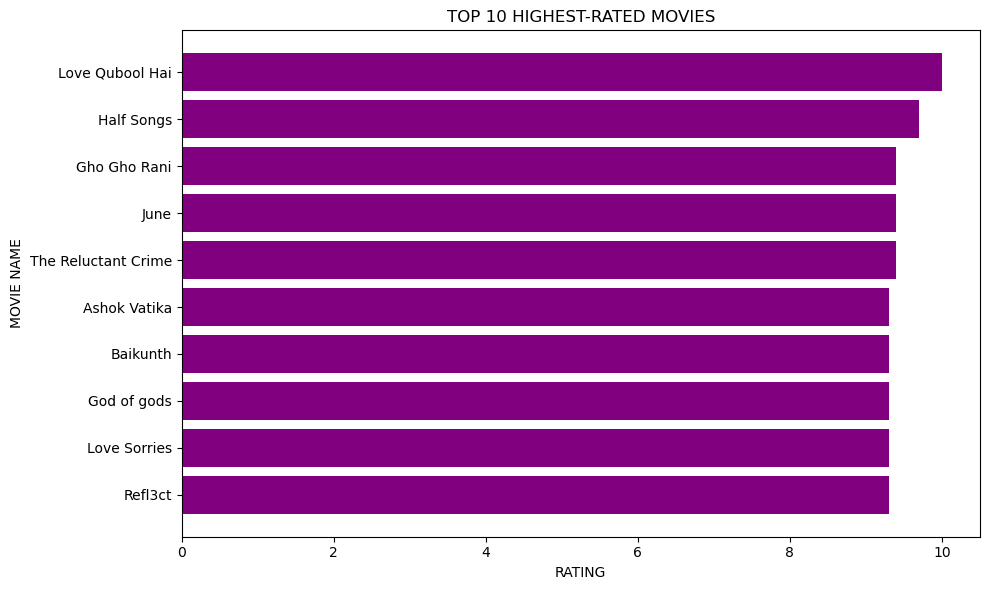

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_titles, top_10_movies['Rating'], color='purple')
plt.xlabel('RATING')
plt.ylabel('MOVIE NAME')
plt.title('TOP 10 HIGHEST-RATED MOVIES')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

#  Statistical Methods

In [21]:
# Mean, Median, Mode
mean_rating = data['Rating'].mean()
median_rating = data['Rating'].median()
mode_rating = data['Rating'].mode().values[0]

print("Mean Rating:",mean_rating) 
print("Median Rating:",median_rating) 
print("Mode Rating:",mode_rating)


Mean Rating: 5.898533309772045
Median Rating: 6.1
Mode Rating: 6.8


In [22]:
# Standard Deviation, Variance
std_deviation = data['Rating'].std()
variance = data['Rating'].var()

print("Standard Deviation:",std_deviation)
print("Variance:",variance)


Standard Deviation: 1.3811651416632527
Variance: 1.907617148545673


# Feature engineering

In [23]:
director_movie_count = data['Director'].value_counts().to_dict()
data['director_movie_count'] = data['Director'].map(director_movie_count)

actor1_movie_count = data['Actor 1'].value_counts().to_dict()
data['actor1_movie_count'] = data['Actor 1'].map(actor1_movie_count)

actor2_movie_count = data['Actor 2'].value_counts().to_dict()
data['actor2_movie_count'] = data['Actor 2'].map(actor2_movie_count)

actor3_movie_count = data['Actor 3'].value_counts().to_dict()
data['actor3_movie_count'] = data['Actor 3'].map(actor3_movie_count)

In [24]:
# Define features and target variable
features = ['director_movie_count', 'actor1_movie_count', 'actor2_movie_count', 'actor3_movie_count']  # Adjust features as needed
target = 'Rating'


In [25]:
# Splitting the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.8455867738546468
R-squared (R2): 0.003324905307166004


# Chi-square and ANNOVA test

In [27]:
contingency_table = pd.crosstab(data['Genre'], data['Rating'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:",chi2)
print("p-value:",p)


Chi-Square Statistic: 35177.739826861136
p-value: 1.3392818212821514e-65


In [28]:
f_scores, p_values = f_classif(X, y)
print("F-scores:",f_scores)
print("p-values:",p_values)


F-scores: [1.55495637 1.52644372 1.908516   1.48167237]
p-values: [1.07174443e-03 1.67393496e-03 1.81421655e-06 3.29100577e-03]


# Boxplot for movie ratings

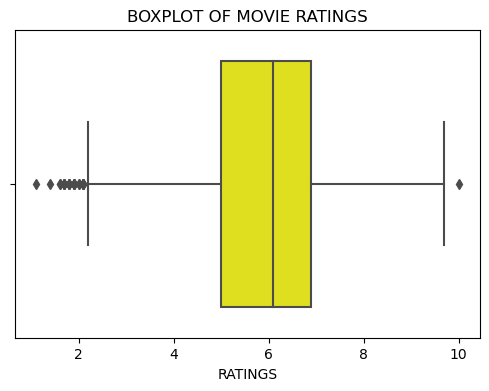

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Rating'], color='yellow')
plt.title('BOXPLOT OF MOVIE RATINGS')
plt.xlabel('RATINGS')
plt.show()


# Linear regression model

In [30]:
# Assuming 'model' is your trained Linear Regression model
# Assuming 'X_test' contains the features of your test dataset

# Making predictions on the test set
predictions = model.predict(X_test)

# Printing sample predictions
print(predictions)

[5.99762851 5.86287156 5.97763539 ... 5.97875401 6.02058412 5.86839786]


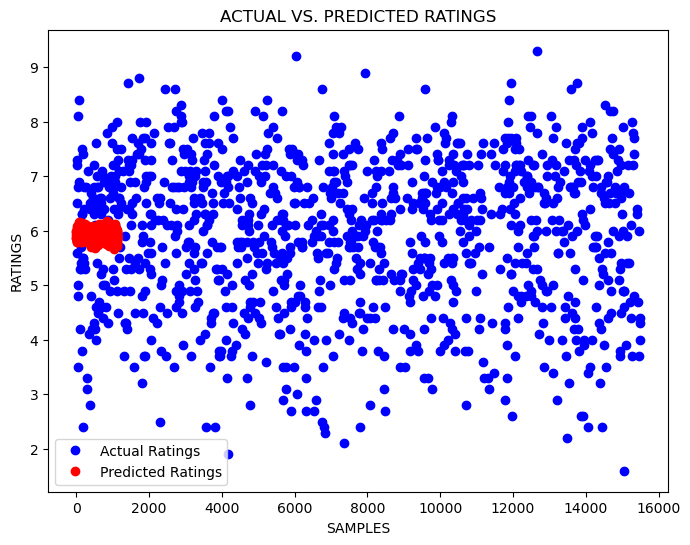

In [31]:
# Create a line plot for actual vs. predicted ratings
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual Ratings', marker='o', linestyle='', color='blue')
plt.plot(predictions, label='Predicted Ratings', marker='o', linestyle='', color='red')
plt.title('ACTUAL VS. PREDICTED RATINGS')
plt.xlabel('SAMPLES')
plt.ylabel('RATINGS')
plt.legend()
plt.show()


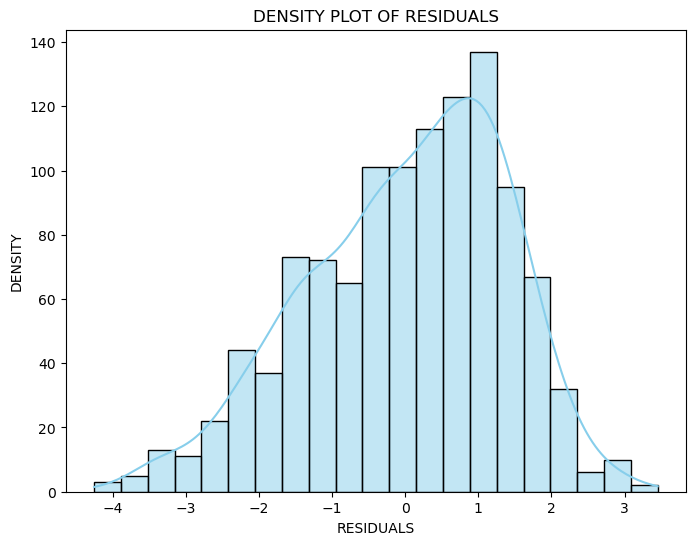

In [32]:
# Assuming 'y_test' contains actual ratings and 'predictions' contains predicted ratings

# Calculate residuals (difference between actual and predicted values)
residuals = y_test - predictions

# Create a density plot for residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('DENSITY PLOT OF RESIDUALS')
plt.xlabel('RESIDUALS')
plt.ylabel('DENSITY')
plt.show()